In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

sns.set("talk", "ticks", palette="colorblind", color_codes=True, font_scale=1.85)

%matplotlib inline

def major_ticks(x, pos=None):
    """Set the major ticks according 
    to this custom style
    """
    x = mdates.num2date(x)
    if pos == 0:
        fmt = "%-d\n%b %Y"
    else:
        fmt = "%-d"
    return x.strftime(fmt)


## Load the results from the 3-factor solution

In [3]:
df = pd.read_feather("../data/output/tata2017015/nmf-tseries-results.feather").set_index("index")

df = df.resample("15min").mean()[["HOA/BBOA", "Factor 1"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3455 entries, 2018-01-10 00:15:00+05:30 to 2018-02-14 23:45:00+05:30
Freq: 15T
Data columns (total 2 columns):
HOA/BBOA    2394 non-null float64
Factor 1    2987 non-null float64
dtypes: float64(2)
memory usage: 81.0 KB


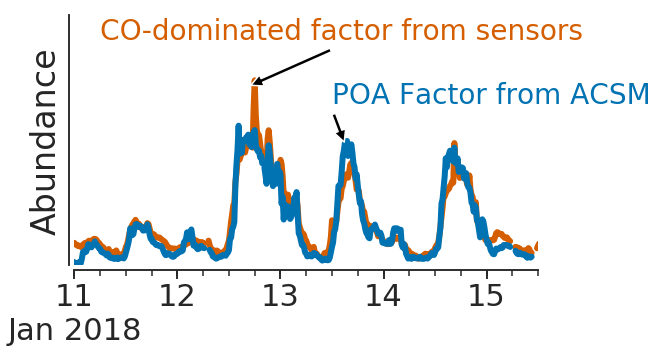

In [93]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(df["Factor 1"]*50, lw=6, label="Factor 1 (CO-dominated) from MPAQS", color="r")
ax.plot(df["HOA/BBOA"], lw=6, label="HOA/BBOA from ACSM", color="b")


ax.set_xlim("2018-01-11", "2018-01-15 12:00")
# ax.legend()
ax.set_ylim(0, None)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(FuncFormatter(major_ticks))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))
ax.set_yticks([])
ax.set_ylabel("Abundance")
# ax.set_title("Comparison of the PMF HOA/BBOA Factor vs.\nthe LCS NMF CO-dominated Factor", y=1.05)
ax.yaxis.set_label_coords(-0.025, .5)

sns.despine(right=True, offset=5)

ax.annotate("CO-dominated factor from sensors", xy=("01-12-2018 16:00", 220), 
            xytext=("01-11-2018 6:00", 280), fontsize=28, color='r', 
           arrowprops=dict(facecolor="black", shrink=.05))

ax.annotate("POA Factor from ACSM", xy=("01-13-2018 15:00", 150), 
            xytext=("01-13-2018 12:00", 200), fontsize=28, color='b', 
           arrowprops=dict(facecolor="black", shrink=.05))

plt.tight_layout()

fig.savefig("toc-pt-2.png", transparent=True, dpi=500, bbox_inches='tight')

In [9]:
img = plt.imread("delhi.image.dhh.png")
img.shape

(2800, 3024, 3)

1900 3800


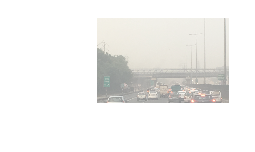

In [91]:
# https://stackoverflow.com/questions/15160123/adding-a-background-image-to-a-plot-with-known-corner-coordinates/15160269

aspect = 2

h1 = 400
h2 = 2300

w1 = 100
w2 = aspect * (h2 - h1) + w1

print (h2 - h1, w2 - w1)

img2 = img[h1:h2, w1:w2, :]

fig, ax = plt.subplots(1, figsize=(8/2.54, 4/2.54))

ax.imshow(img2, alpha=.55)

plt.axis("off")

plt.savefig("toc-pt-1.svg", dpi=500, frameon=False, bbox_inches='tight', pad_inches=0)